## BEEM011 - Written Assignment, Term 1 2024

#### WRITE YOUR R CODE AND ANSWERS FOR ALL OF THE QUESTIONS IN THIS JUPYTER NOTEBOOK.  


#### INCLUDE YOUR CANDIDATE NUMBER IN A COMMENT AT THE TOP OF YOUR CODE. 
#### DO NOT PUT YOUR NAME ANYWHERE IN THE ASSIGNMENT OR FILENAME.

### Instructions

#### Summative assessment
Direction: This Assignment consists of 3 questions with multiple parts. There are 100 marks in total.  

5% of marks are reserved for evidence of best practice in R coding, marks for sub-questions therefore add up to 95 of the 100 total marks for the assignment.

Unless otherwise stated you should use a 5% significance level for hypothesis tests.

Answer all the questions and upload 3 files to the ELE submission point:
1) Your Jupyter Notebook file (.ipynb) with all your code executed; 

2) a PDF copy of your Jupyter Notebook with all your code executed; and 

3) your AI declaration form. 


In your Jupyter Notebook file, comment on each procedure to explain what you are doing (or intend to do). Submission is via ELE2 at https://ele.exeter.ac.uk/mod/coursework/view.php?id=3462086.
- Click on the link
- Upload your 3 files (see above)
- Submit your work
Submission of an incorrect filetype will result in the deduction of marks.

Read and answer each of the questions **using your own code and words**.  

Collaboration with others and plagiarism of other people's code are not permitted. Presenting someone else's code (including code or interpretations generated by AI) as your own work is **misrepresentation**, an academic conduct offence.

The university's referencing guidelines apply. The referencing system used in the Business School is APA7. The library website provides details on how to correctly reference AI input and output used in your work: https://libguides.exeter.ac.uk/referencing/generativeai  



In the assignment you should not use packages outside of what we have learnt in class. If you use additional packages I expect you to explain why, demonstrate your understanding of how they are functioning and justify why you need this package.

We have covered the following packages in the libraries:

- readxl

- AER

- sandwich

- MASS

- margins

- stargazer

- plm

- ggplot2

- haven

- psych

Some people will also have used the following packages for installation:

- base

- devtool

## Question 1 [25 marks]

You are analyzing the determinants of credit card default using a dataset of financial and demographic characteristics from randomly sampled individuals with credit cards. The dataset includes the following variables:

- Default (binary): Whether the individual failed to make a repayment on their credit card debt (1 = default, 0 = no default).
- Income (continuous): The individual’s monthly income (in $1,000s).
- CreditScore (continuous): The individual’s credit score.
- Age (continuous): The individual’s age (in years).
- Education (categorical): The individual's highest level of education (e.g., "High School," "College," "Graduate").
- CreditCardBalance (continuous): The individual's current credit card balance (in $1,000s).
- Year (continuous): The year that each observation relates to.
- IndividualID (continuous): An individual identifier for each person in the dataset.

a) Load the data stored in the defaults.csv file and store this in an object named *mydata* 

In [365]:
#Load the 'AER'library  
library(AER)
#read the 'defaults.csv' file into the dataframe
mydata<- read.csv('defaults.csv')
#dispalys the head of the first few rows of the dataframe
head(mydata)


,X,IndividualID,Year,Income,CreditScore,Age,Education,CreditCardBalance,Default
,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<int>
1,1,1,2019,3.5,615,42,College,0.64,0
2,2,1,2020,6.3,694,43,College,6.58,0
3,3,1,2021,2.4,643,44,College,0.00,0
4,4,1,2022,8.7,594,45,College,13.35,0
5,5,1,2023,8.6,673,46,College,13.18,0
6,6,2,2019,5.3,726,40,Graduate,3.92,0


b) What time period is this data for?  [1 mark]

In [366]:
#finding the earliest year of the data set
start_year <-min(mydata$Year)
#finding the latest year of the data set
end_year <-max(mydata$Year)
#cat()combines start_year and end_year into a single output line.
cat(start_year, "to",end_year )


2019 to 2023

c) Set the random number seed equal to your **candidate number**.  Use R code to select a year at random and take the subset of *mydata* for that year. Save the subset of data in an object called *mysubset*. Report the year that was selected in your answer. [4 marks]

In [367]:
#Setting the random seed to the candidate number 
set.seed(019615)
#selecting a random year using r code
unique_year<-unique(mydata$Year)
#here in the below r_year represents random year taken 
random_year <- sample(unique_year,1)

#subset the mydata for the selected year i.e 2022
mysubset <- subset(mydata,Year==random_year)
cat("Selected year:",random_year)



Selected year: 2022

d) Using your subset, calculate the probability of default (Default = 1) for the following types of individuals 

- All individuals
- Individuals with an income greater than $6,000
- Individuals with a credit score less than 600

Give your answer to three decimal places and provide an interpretation of these probabilities in the context of credit risk assessment. [5 marks]

In [368]:
#calculating the probability 
prob_all <- mean(mysubset$Default == 1)
# calculating the proabbility of income > 6000
prob_income_high <- mean(mysubset$Default[mysubset$Income >6.0]==1)
#calculating the probability of creditscore<600
prob_credit_low <- mean(mysubset$Default[mysubset$CreditScore <600]==1)
cat("Selected year:", random_year, "\n")
cat("Probability of default (all individuals):", round(prob_all,3), "\n")
cat("Probability of default (Income > $6,000):", round(prob_income_high,3), "\n")
cat("Probability of default (Credit Score < 600):", round(prob_credit_low,3), "\n")

Selected year: 2022 
Probability of default (all individuals): 0.06 
Probability of default (Income > $6,000): 0.064 
Probability of default (Credit Score < 600): 0.044 


e) Plot and describe the distribution of CreditCardBalance in your subset. [5 marks]

,X,IndividualID,Year,Income,CreditScore,Age,Education,CreditCardBalance,Default
,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<int>
1,1,1,2019,3.5,615,42,College,0.64,0
2,2,1,2020,6.3,694,43,College,6.58,0
3,3,1,2021,2.4,643,44,College,0.00,0
4,4,1,2022,8.7,594,45,College,13.35,0
5,5,1,2023,8.6,673,46,College,13.18,0
6,6,2,2019,5.3,726,40,Graduate,3.92,0


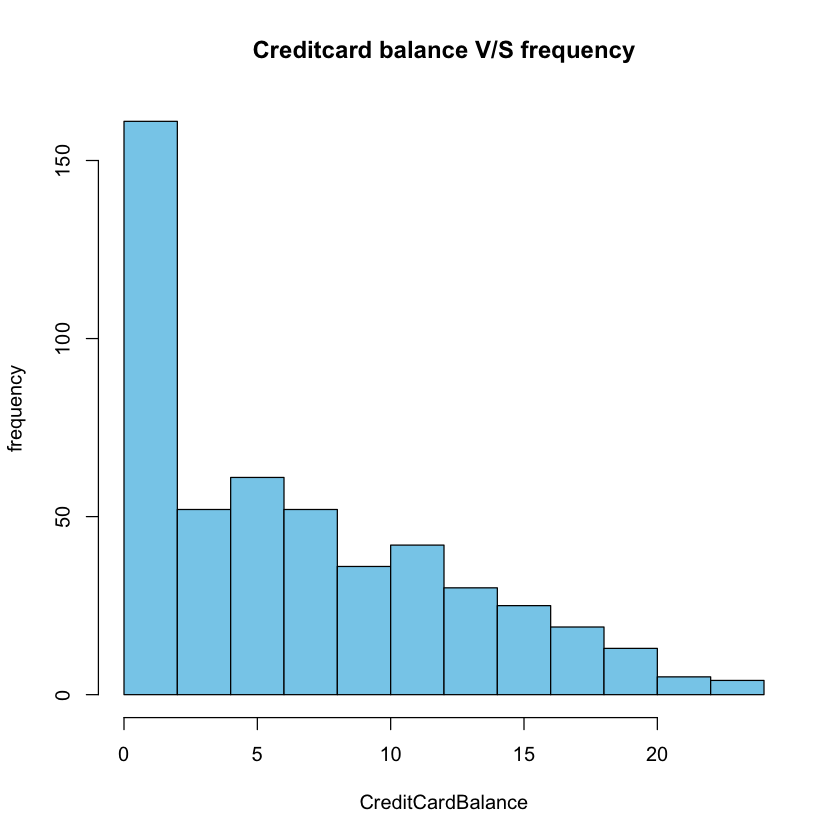

In [369]:
#install.packages(ggplot2)
library(ggplot2)
head(mydata)
#creating a histogram for the given distribution
hist(mysubset$CreditCardBalance,breaks=10,xlab = "CreditCardBalance",ylab = "frequency",main ="Creditcard balance V/S frequency",col = 'skyblue')


The histogram describes the frequency distribution of credit card balances. Abscissa is the interval wise credit card balance values, and the ordinate is the frequency of observation in that particular range. The title clearly states the relationship depicted in the title, "Credit Card Balance vs Frequency.The shape of the histogram symbolizes a right skew (positively skewed) distribution where most of the credit card balances are represented in lower ranges, and the frequency is inversed with the rise in the balance. It implies that most people in the dataset tend to have lower credit card balances, while only a few possess a higher credit card balance. The bars are composed of five intervals, which have been filled with a sky-blue color making this visualization clear and interpretable.

f) Imagine that two individuals have been selected randomly from your subset. Assume that the probability of each individual defaulting is conditionally independent of another individual defaulting. If one of the individuals in this selection has defaulted, without conditioning on any individual characteristics what is the probability that the other individual has also defaulted? 

Now imagine that two individuals with incomes over $6,000 have been selected from your subset. If one of the individuals in this selection has defaulted, what is the probability that the other individual has also defaulted? Assume that the events are conditionally independent. If one of the individuals in this new selection has defaulted, what is the probability that the other individual has also defaulted? 

Explain your steps and interpret your results in terms of default risk.  [10 marks]

In [387]:
# Overall default probability
prob_all1 <- mean(mysubset$Default == 1)
cat("Overall probability defaulting:",round(prob_all1,3),"\n")

# Overall probability of not defaulting
prob_not= 1-prob_all1
cat("Overall probability of not defaulting:",round(prob_not,3),'\n')

# Probability of both individuals defaulting 
prob_both_default <- prob_all1 * prob_all1
cat("Probability of both Defaulting :",round(prob_both_default,3),"\n")

# Probability of both not defaulting 
prob_both_not_defaulting=prob_not*prob_not
cat("Probability of both not defaulting:",round(prob_both_not_defaulting,3),"\n")

# Probability of both individuals defaulting while one as defaulted
prob_both_defaulting <- prob_both_default/(1-prob_both_not_defaulting)
cat("Probability of both individuals defaulting while one as already defaulted:",round(prob_both_defaulting,3),"\n")



Overall probability defaulting: 0.06 
Overall probability of not defaulting: 0.94 
Probability of both Defaulting : 0.004 
Probability of both not defaulting: 0.884 
Probability of both ondividuals defaulting while one as already defaulted: 0.031 


In [389]:
# FOR INDIVIDUAL WHOSE INCOME IS MORE THAN $6000

#Overall default probability
prob_all2 <- mean(mysubset$Default[mysubset$Income >6.0]==1)
cat("Overall probability defaulting:",round(prob_all2,3),"\n")

# Overall probability of not defaulting
prob_not= 1-prob_all2
cat("Overall probability of not defaulting:",round(prob_not,3),'\n')

# Probability of both individuals defaulting 
prob_both_default <- prob_all2 * prob_all2
cat("Probability of both Defaulting :",round(prob_both_default,3),"\n")

# Probability of both not defaulting 
prob_both_not_defaulting=prob_not*prob_not
cat("Probability of both not defaulting:",round(prob_both_not_defaulting,3),"\n")

# Probability of both individuals defaulting while one as defaulted
prob_both_defaulting <- prob_both_default/(1-prob_both_not_defaulting)
cat("Probability of both individuals defaulting while one as already defaulted:",round(prob_both_defaulting,3),"\n")

Overall probability defaulting: 0.064 
Overall probability of not defaulting: 0.936 
Probability of both Defaulting : 0.004 
Probability of both not defaulting: 0.876 
Probability of both individuals defaulting while one as already defaulted: 0.033 


The overall default probability is calculated as the ratio of individuals who default to the total population. The complementary value of this is taken to get the probability of not defaulting. Under the assumption of independent events, these values are then used to compute the probability of both individuals defaulting or both not defaulting. This then leads to the computation of the conditional probability of both having defaulted given that one has already defaulted; which indicates systemic risk and also dependency in terms of defaults.

This is followed by the computing of default probabilities from the code for the segment of the population that earns a higher income (greater than $6,000). It computes this set of probabilities-default, not default, joint defaults, conditional joint defaults-giving light to the influence of income in the credit risk. As a rule, high-income people have a lower default number, thus reflecting the reduced credit risk in this subcategory.


## Question 2 [45 marks]

In this question you should work with the subset data stored in the object $mysubset$.

a) You have been asked to use the data to explore the relationship between credit card balances and individual characteristics including income, age and credit rating. 

Using your *mysubset* data and your own theoretical insights to support your reasoning, write down the population regression equation for the the model you would estimate first and explain (max 200 words) why you chose this model.  [10 marks]

$ Credit balance= \beta_0+\beta_1(income)+\beta_2(Age)+\beta_3(Creditscore)+ui $

This model is selected because credit card balance is influenced by economic capacity, financial habits, and access to credit.

Income: The higher the income, the more disposable resource one has, which perhaps leads to higher balances.

Age: Age reflects the stage of life, which affects the way people spend and use credit. Younger people might use credit for education or startups, while older individuals may have larger credit limits due to experience and established credit histories.

Credit Score: The higher the credit score, the higher the credit limits; hence, one can have higher balances.

By including these variables, the model represents major financial and demographic variables and gives a wide view of their relationship with credit card balances. This regression framework also supports further hypothesis testing and model refinement as needed.

b) Plot Credit Card Balance against Income [3 marks]

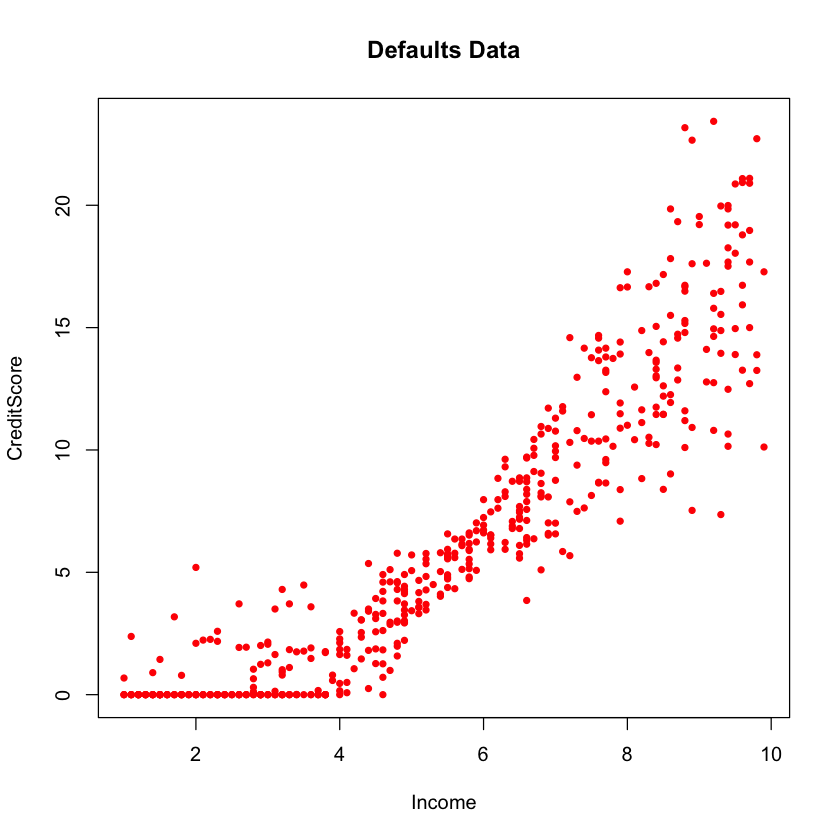

In [372]:
#plotting creditscore over income

plot(mysubset$CreditCardBalance~mysubset$Income, main= "Defaults Data", xlab = "Income", ylab="CreditScore", pch=20, col="red")



c) Explain the sign that you would expect each coefficient to have in the population regression model. [5 marks]

In the population regression model that describes Credit Card Balance using Income, CreditCardBalance = $\beta_0$ + $\beta_1$×Income + ϵ where $\beta_0$= intercept term; $\beta_1$ = slope coefficient on income; ϵ = error term. 

1. Intercept ($\beta_0$) Expected Sign: Positive or zero. The intercept is that value of credit card balance that is expected when a person has zero income. Although zero income is rare, the intercept is necessary for the regression equation. It can capture any baseline or fixed costs not dependent on income. A positive value is plausible as some credit card balances will persist even with low or no income because of borrowing behavior. 

2. Slope Coefficient for Income ($\beta_1$): Expected Sign: Positive ($\beta_1$ > 0). From the scatter plot, it can be observed that there is a positive correlation between credit card balance and income: the higher the income level, the higher the credit card balances. This could be indicative of a better purchasing power and increased spending behavior associated with high-income individuals. Therefore, the slope coefficient for income is expected to be positive, reflecting that for every one unit increase in income, the credit card balance increases by β1 units. 

3. The Credit Card Balance itself will always be positive, as the intercept and positive slope contribute to the predicted value. If income is very low, the model might predict a balance close to ($\beta_0$), but due to the nature of the data, credit card balances won't go negative.

4. Credit score ($\beta_3$):Excepted sign:positive.Individual who have higher credit score usual tend to have higher credit card balance as they woundn't have defaulted hence, they are offerd with higher credit card balance.

5. The error term corrects the equation for over or under predictions but does not systematically affect the sign of the overall balance.



d) Do you have any concerns about violation of the assumptions required for OLS to be the Best Linear Unbiased Estimator? If so, explain these (maximum 150 words). [5 marks]

Yes, there are potential concerns about the violation of the assumptions required for Ordinary Least Square(OLS) to be the Best Linear Unbaised Estimator:

1.Homoscedasticity: The scatter plot suggests that variability in credit card balance increases with income, indicating potential heteroscedasticity. This violates the assumption of constant variance of errors.

2.Linear: While the relationship between income and credit card balance appears roughly linear, the spread of data at higher incomes could indicate non-linearity or the need for transformations.

3.Multicollinearity: If additional predictors like age or credit rating are highly correlated with income, it could inflate standard errors, making estimates less reliable.

4.Normality of Errors: Outliers in the data could skew the error distribution, violating the normality assumption.

5.Independence of Errors: If the data involves repeated measures or grouped individuals, error terms may be correlated, violating independence.
Addressing these issues through diagnostics and transformations is critical for valid OLS estimates.


e) Estimate the model and interpret the coefficients on income, age and credit score. [10 marks]

In [373]:
#fitting the linear regression model and estimating using lm function
reg1 <- lm(CreditCardBalance ~ Income + Age + CreditScore, data = mysubset)
summary(reg1) #displays all the coeffiecient and details of the model


Call:
lm(formula = CreditCardBalance ~ Income + Age + CreditScore, 
    data = mysubset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3919 -1.6319 -0.5064  1.3725  9.6383 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.748407   1.535723   0.487    0.626    
Income       2.145190   0.041686  51.461  < 2e-16 ***
Age          0.006947   0.012447   0.558    0.577    
CreditScore -0.009812   0.002229  -4.402 1.31e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.352 on 496 degrees of freedom
Multiple R-squared:  0.843,	Adjusted R-squared:  0.8421 
F-statistic: 887.8 on 3 and 496 DF,  p-value: < 2.2e-16


In [374]:
#loading "strargazer" library
library(stargazer)
stargazer(reg1,type="text",digits=2,report=("vc*sp"),ci= TRUE)


                        Dependent variable:    
                    ---------------------------
                         CreditCardBalance     
-----------------------------------------------
Income                        2.15***          
                           (2.06, 2.23)        
                             p = 0.00          
                                               
Age                            0.01            
                           (-0.02, 0.03)       
                             p = 0.58          
                                               
CreditScore                  -0.01***          
                          (-0.01, -0.01)       
                            p = 0.0001         
                                               
Constant                       0.75            
                           (-2.26, 3.76)       
                             p = 0.63          
                                               
---------------------------------------


### Interpretation of the coefficients:
1. Intercept:
The intercept is a point that gives the value of CreditCardBalance that is predicted when all independent variables, namely Income, Age, and CreditScore, are all set to zero values. Of course, this will only be a mathematical value, not practically important in this context because such a situation where a person has zero on these values is highly improbable.

2. Income:
For every one-unit increase in Income, it is expected that CreditCardBalance would increase by 2.15 units with others held constant. As this coefficient is quite small, the rise in CreditCardBalance per unit increment in Income is minimal and reflects a very weak positive relationship between income and credit card balance. Normally, income tends to be a very high figure-for instance, by the thousands-so, comparatively speaking, this variable probably has a positive effect on CreditCardBalance overall, though the coefficient demonstrates that the overall impact is fairly limited.

3. Age:
The coefficient for the Age explains that for each additional year, CreditCardBalance increases by 0.01 units, all else being held constant for Income and CreditScore. So, it states that age is not significant enough in the prediction of CreditCardBalance. Therefore, even if we have a positive correlation, age does not really appear to be a significant variable in explaining credit card balances within this model. 

4. CreditScore: CreditScore would tend to decrease the CreditCardBalance by -0.01 units, keeping Income and Age constant. Evidently, this negative relationship means that high-credit individuals statistically can have less balance on credit cards.




f) Test the null hypothesis that the coefficient on age is equal to the negative of the coefficient on credit score.  Explain each step of your hypothesis test. [10 marks]

### HYPOTHESIS STATEMENT

$$(H₀):  𝛽(Age) = −𝛽(CreditScore) $$

This means that the effect of Age on CreditCardBalance is exactly the opposite of the effect of CreditScore on CreditCardBalance.

$$(H₁): 𝛽(Age) ≠ −𝛽(CreditScore)$$

This means that the effects of Age and CreditScore on CreditCardBalance are not equal and opposite.

In [404]:
# Conducting f-Test for the following observations
q = 3
n = 500
k = 3
alpha = 0.05
#computing the f-critical 
F_critical <- qf(1-alpha, q, n-k-1)
F_critical

[1] 2.622879

In [397]:
#Linear hypothesis testing 
hypothesis <- c('Age+CreditScore=0')
print(linearHypothesis(reg1,hypothesis,vcov. = vcovHC,type = "HC1"))
# Calculating robust standard errors
robust <- sqrt(diag(vcovHC(reg1,"HC1")))
#The coefficient estimates along with robust standard errors
coeftest(reg1,vcov.=vcovHC,type="HC1")




Linear hypothesis test:
Age  + CreditScore = 0

Model 1: restricted model
Model 2: CreditCardBalance ~ Income + Age + CreditScore

Note: Coefficient covariance matrix supplied.

  Res.Df Df      F Pr(>F)
1    497                 
2    496  1 0.0572  0.811



t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  0.7484073  1.4711465  0.5087    0.6112    
Income       2.1451895  0.0517730 41.4345 < 2.2e-16 ***
Age          0.0069471  0.0119536  0.5812    0.5614    
CreditScore -0.0098123  0.0022461 -4.3686 1.523e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [377]:
# Compute the f-statistic
summary_reg1 <- summary(reg1)
f_statistic <- summary_reg1$fstatistic[1]
f_statistic


value 
887.8387

In [378]:
#Computing p_value
summary<- linearHypothesis(reg1,hypothesis,vcov.= vcovHC,type="HC1")
p_value <- summary$Pr[2]
# reject null if Pr(>F) > F_critical
if (p_value < alpha) {
    print("reject the null hypothesis")
} else{
    print("We fail to reject the null hypothesis at 5% and 1% significance level")
}


[1] "We fail to reject the null hypothesis at 5% and 1% significance level"


### Conclusion

If Pr(>F) 0.05, we reject the null hypothesis.
As the Pr is <b>0.811</b> greater than the null hypothesis <br>
<b>We fail to reject the null hypothesis.</b>

g) Evaluate the fit of the model. [2 marks]

In [403]:
#Evaluating the fit of the model
summary(reg1)
# Extracting R-squared value
rsq <- summary(reg1)$r.squared
#extracting the adjusted R -squared
adj_rsq <- summary(reg1)$adj.r.squared
f_statistic <- summary(reg1)$fstatistic[1]
p_value_f_stat <- pf(f_statistic, df1 = summary(reg1)$fstatistic[2], df2 = summary(reg1)$fstatistic[3])

# Print the results
cat("R-squared: ", rsq, "\n")
cat("Adjusted R-squared: ", adj_rsq, "\n")
cat("F-statistic: ", f_statistic, "\n")
cat("p-value for F-statistic: ", p_value_f_stat, "\n")


Call:
lm(formula = CreditCardBalance ~ Income + Age + CreditScore, 
    data = mysubset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3919 -1.6319 -0.5064  1.3725  9.6383 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.748407   1.535723   0.487    0.626    
Income       2.145190   0.041686  51.461  < 2e-16 ***
Age          0.006947   0.012447   0.558    0.577    
CreditScore -0.009812   0.002229  -4.402 1.31e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.352 on 496 degrees of freedom
Multiple R-squared:  0.843,	Adjusted R-squared:  0.8421 
F-statistic: 887.8 on 3 and 496 DF,  p-value: < 2.2e-16


R-squared:  0.8430139 
Adjusted R-squared:  0.8420644 
F-statistic:  887.8387 
p-value for F-statistic:  1 


The R-squared value of 0.8346 indicates that approximately 84.3% of the variance in the CreditCardBalance is explained by the independent variables (Income, Age, and CreditScore), which suggests a strong model fit. The Adjusted R-squared of 0.8430139 slightly adjusts for the number of predictors, showing that the model still explains a significant portion of the variance after considering the number of variables used. The F-statistic of 887.8387 with a p-value < 2.2e-16 indicates that the model is statistically significant, meaning at least one predictor (Income, Age, or CreditScore) has a significant relationship with CreditCardBalance. The p-value for F-statistic being 0 further confirms that the model as a whole is statistically significant, and the predictors jointly explain a substantial amount of the variation in the dependent variable. The Residual standard error of 2.352 indicates the average distance between the observed and predicted values, suggesting reasonable accuracy in predictions.

## Question 3 [25 marks]

In this Question you should work with the full panel of data stored in the object $mydata$.

a) Using examples, explain why you would want to include fixed effects in a panel linear model for Credit Card Balance [5 marks]


In the context of panel data models, fixed effects handle heterogeneity for individual units since there could be unobservable factors varying across units yet not over time that could affect the dependent variable of interest.

### Examples as to why there is a need for fixed effects:
1. **Unobserved Individual Characteristics**: There could be some factors, like personal preference or spending habit, which might affect an individual's credit card balance but do not vary over time. Fixed effects control for such factors by focusing on variation within individuals rather than across individuals.
2. **Control for Time-invariant Variables**: If there are variables that do not change over time, such as an individual's risk tolerance or financial habits, these factors may have a significant impact on their credit card balance. Without fixed effects, the model could incorrectly attribute changes in credit card balances to these time-invariant characteristics.
3. **Within-Individual Comparisons**: The inclusion of fixed effects will enable you to assess how credit card balance for the same individual varies over time, controlling for the effect of time-invariant characteristics like gender, occupation, or any other unobserved factor.

By controlling for fixed effects, you ensure that your model captures these individual-level unobserved factors and yields more accurate and reliable estimates of how variables such as income, age, or credit score influence the credit card balance over time.


b) Write down a population regression equation for Credit Card Balance including log(income), age and credit score, which allows the intercept and the marginal effect of income to differ for individuals over 40 years old compared to those who are 40 and under. [4 marks]

$ CreditCardBalance $ = $ \beta_0 $ +$\beta_1$ log(Income)+$\beta_2$(Age)+$\beta_3$(CreditScore)+$\beta_4$(Age)×log(Income)+ϵ



Where:

 CreditCardBalance, is the credit card balance for individual i,\n<br>
 log(Income), is the logarithm of income for individual i,<br>
 Age, is the age of individual i,<br>
CreditScore, is the credit score of individual i,<br>
Age × log(Income) is the interaction term between age and income (where Age > 40 is used as a threshold to create the dummy),<br>
ϵᵢ is the error term.


### Interpretation of coefficients


$\beta_0$: The intercept term represents the expected credit card balance when all variables (log(income), age, credit score) are zero for individuals aged 40 and under.<br>
$\beta_1$: The coefficient for log(Incomeᵢ) represents the effect of income on the credit card balance for individuals aged 40 and under.<br>
$\beta_2$: The coefficient for Ageᵢ captures the direct effect of age on the credit card balance.<br>
$\beta_3$: The coefficient for CreditScoreᵢ measures the impact of credit score on the credit card balance.<br>
$\beta_4$: The coefficient for the interaction term Ageᵢ × log(Incomeᵢ) measures how the effect of income on the credit card balance changes for individuals over 40 years old compared to those who are 40 and under,this allows for a different marginal effect of income based on age.<br>


c) Using the full panel of data, estimate the model and test the null hypothesis that the marginal effect of income is equal for individuals over 40 and those under and including 40 years of age. [8 marks]

In [411]:
# Loading the plm package for panel data analysis
library(plm)
# Fitting a panel data model 
 p_model<- plm(CreditCardBalance~log(Income)*I(Age > 40) + Age + CreditScore,
 data = mydata,
 model="within",
 index=c("IndividualID","Year"))
 
summary(p_model)


Oneway (individual) effect Within Model

Call:
plm(formula = CreditCardBalance ~ log(Income) * I(Age > 40) + 
    Age + CreditScore, data = mydata, model = "within", index = c("IndividualID", 
    "Year"))

Balanced Panel: n = 500, T = 5, N = 2500

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-8.09751 -2.04215 -0.42835  1.70051 13.19021 

Coefficients:
                              Estimate Std. Error t-value  Pr(>|t|)    
log(Income)                  8.5725485  0.1920542 44.6361 < 2.2e-16 ***
I(Age > 40)TRUE              1.2008443  0.5766165  2.0826   0.03742 *  
Age                         -0.0446223  0.0491832 -0.9073   0.36438    
CreditScore                 -0.0081604  0.0015037 -5.4270 6.428e-08 ***
log(Income):I(Age > 40)TRUE -0.4959426  0.2544206 -1.9493   0.05140 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    71164
Residual Sum of Squares: 22127
R-Squared:      0.68907
Adj. R-Squared: 0.61052
F-statistic: 884.251 on

We are testing the null hypothesis that the marginal effect of income is the same for individuals over 40 and under or equal to 40 years of age. This is done by testing whether the coefficient on the interaction term between log(Income) and the age group dummy variable (AgeGroup) is zero.

The interaction term will tell us if the marginal effect of income differs based on age. If the coefficient on the interaction term is significantly different from zero, it suggests that the effect of income on credit card balance differs by age.

$$Null Hypothesis (H0): log(income):I(Age>40)=0$$
$$ \beta_5 = 0 $$
$$Alternative Hypothesis (H1): log(income):I(Age>40)≠0$$
$$ \beta_5 ≠ 0 $$

In [413]:
# Testing the null hypothesis
summary(p_model)

# Printing a linear hypothesis test
print(linearHypothesis(p_model, "log(Income):I(Age > 40)TRUE", vcov. = vcovHC, type = "HC1"))

Oneway (individual) effect Within Model

Call:
plm(formula = CreditCardBalance ~ log(Income) * I(Age > 40) + 
    Age + CreditScore, data = mydata, model = "within", index = c("IndividualID", 
    "Year"))

Balanced Panel: n = 500, T = 5, N = 2500

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-8.09751 -2.04215 -0.42835  1.70051 13.19021 

Coefficients:
                              Estimate Std. Error t-value  Pr(>|t|)    
log(Income)                  8.5725485  0.1920542 44.6361 < 2.2e-16 ***
I(Age > 40)TRUE              1.2008443  0.5766165  2.0826   0.03742 *  
Age                         -0.0446223  0.0491832 -0.9073   0.36438    
CreditScore                 -0.0081604  0.0015037 -5.4270 6.428e-08 ***
log(Income):I(Age > 40)TRUE -0.4959426  0.2544206 -1.9493   0.05140 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    71164
Residual Sum of Squares: 22127
R-Squared:      0.68907
Adj. R-Squared: 0.61052
F-statistic: 884.251 on


Linear hypothesis test:
log(Income):I(Age > 40)TRUE = 0

Model 1: restricted model
Model 2: CreditCardBalance ~ log(Income) * I(Age > 40) + Age + CreditScore

Note: Coefficient covariance matrix supplied.

  Res.Df Df  Chisq Pr(>Chisq)  
1   1996                       
2   1995  1 2.7769    0.09563 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [419]:
#   Comparing the p_value with coffecients
p_value <- summary(p_model)$coefficients['log(Income):I(Age > 40)TRUE','Pr(>|t|)']
p_value

[1] 0.05139935

In [431]:
#Testing the hypothesis
if(summary(p_model)$coefficients['log(Income):I(Age > 40)TRUE','Pr(>|t|)'] > 0.05) {
  print("Fail to reject the null hypothesis: The marginal effect of income is the same for both age groups.")
} else {
  print("Reject the null hypothesis: The marginal effect of income differs by age group.")
}

[1] "Fail to reject the null hypothesis: The marginal effect of income is the same for both age groups."


Since the p-value is less than 0.05, it suggests that the interaction term is statistically significant, meaning that the marginal effect of income differs between individuals over and under 40 years old.

d) Test the joint significance of the time fixed effects.  Write down the details of the hypothesis test and your conclusion. [5 marks]

In [423]:
# Fit a restricted panel data model 
model_restricted <- plm(CreditCardBalance ~ log(Income)*I(Age > 40) + Age + CreditScore,
data=mydata,
index = c("Year"),
model = "within",
effect = "twoways")
#The fixed effects of the restricted model
fixef(model_restricted,type = "level",effect= "twoways")
# Perform a robust hypothesis test on coefficients
coeftest(model_restricted,vcov.=vcovHC,type = "HC1",cluster="group")
# Perform an F-test to the restricted model with an unrestricted model
pFtest_s <- pFtest(model_restricted,p_model,vcov = vcovHC(model_restricted,cluster = "group"))
pFtest_s



2019-1      2019-2      2019-3      2019-4      2019-5      2019-6 
-2.35735443 -2.70357282 -2.50818271 -3.69255678 -2.61101399 -3.54063108 
     2019-7      2019-8      2019-9     2019-10     2019-11     2019-12 
-3.46060916 -4.47453028 -1.58963610 -0.23736739 -2.29082494 -4.16754582 
    2019-13     2019-14     2019-15     2019-16     2019-17     2019-18 
-3.21851044 -0.28732360  0.02080836 -1.62991589 -3.39586665 -1.65691669 
    2019-19     2019-20     2019-21     2019-22     2019-23     2019-24 
-1.03941372 -1.46940288 -1.61302793 -0.98798955 -2.79460204 -3.30275012 
    2019-25     2019-26     2019-27     2019-28     2019-29     2019-30 
-2.68590722 -0.03100329 -2.56302200 -3.59781067 -1.21913995 -3.30447895 
    2019-31     2019-32     2019-33     2019-34     2019-35     2019-36 
 0.10654008 -1.71065210 -3.56962547  0.81577436 -2.38139897 -2.55512460 
    2019-37     2019-38     2019-39     2019-40     2019-41     2019-42 
-0.83733210 -1.71056029 -0.20729151 -0.21193188 -3.41363509 -0.77781329 
    2019-43     2019-44     2019-45     2019-46     2019-47     2019-48 
-0.05554935 -0.59806563 -0.93474109 -1.83634382 -1.70890790  1.83667382 
    2019-49     2019-50     2019-51     2019-52     2019-53     2019-54 
-3.16001180 -1.90456094 -1.26251894 -1.44565713 -1.92262786 -1.27208790 
    2019-55     2019-56     2019-57     2019-58     2019-59     2019-60 
-1.75091964 -2.33551098 -2.32959640 -3.92325372 -1.05367073 -2.00882079 
    2019-61     2019-62     2019-63     2019-64     2019-65     2019-66 
 0.27141524 -1.53832627 -1.32911563 -0.89767639 -2.54269666 -2.23490777 
    2019-67     2019-68     2019-69     2019-70     2019-71     2019-72 
-4.18241878 -2.61251512 -3.92500866 -0.84847791  1.62176315 -3.76991938 
    2019-73     2019-74     2019-75     2019-76     2019-77     2019-78 
-2.58628951 -2.39581218 -4.38145465 -0.47164777 -1.04659539 -2.36865396 
    2019-79     2019-80     2019-81     2019-82     2019-83     2019-84 
-2.74125183 -2.68135946 -3.33018628  1.76329015 -1.72911694 -1.51499060 
    2019-85     2019-86     2019-87     2019-88     2019-89     2019-90 
-0.67622359 -0.69095299 -2.20046016 -3.14771968 -2.30390339 -1.70052131 
    2019-91     2019-92     2019-93     2019-94     2019-95     2019-96 
-0.04517213 -2.30402840 -0.47009694 -1.28523750 -1.55557903  1.13084193 
    2019-97     2019-98     2019-99    2019-100    2019-101    2019-102 
 2.09422723 -0.84809085  1.33755950  0.20985981 -1.98848877 -3.67634765 
   2019-103    2019-104    2019-105    2019-106    2019-107    2019-108 
-2.04780531 -2.29689320 -1.82479561 -0.65023761 -3.87451943 -3.31565358 
   2019-109    2019-110    2019-111    2019-112    2019-113    2019-114 
-2.64522177 -2.37675642 -2.64977434 -3.66000540 -3.00587516 -0.04765711 
   2019-115    2019-116    2019-117    2019-118    2019-119    2019-120 
 0.11655043 -2.76182171 -1.58857180 -5.16373589 -2.41431236 -1.57925924 
   2019-121    2019-122    2019-123    2019-124    2019-125    2019-126 
-0.63918460 -1.44704329 -2.93493504 -4.24099561  1.67644954 -3.03071357 
   2019-127    2019-128    2019-129    2019-130    2019-131    2019-132 
-2.05492011 -2.84792131  0.26433805 -0.53645430 -2.18828190  0.08654793 
   2019-133    2019-134    2019-135    2019-136    2019-137    2019-138 
-1.36337648 -4.28492517 -2.56257109 -2.26628046 -2.55851078  0.68211984 
   2019-139    2019-140    2019-141    2019-142    2019-143    2019-144 
-0.16809937 -0.42616478 -0.29343446 -1.87468420 -0.00947038 -1.47210637 
   2019-145    2019-146    2019-147    2019-148    2019-149    2019-150 
-3.14008323 -2.44967366  0.29802387 -2.21395380  0.94830432 -0.81083549 
   2019-151    2019-152    2019-153    2019-154    2019-155    2019-156 
-2.78641146  0.80631299 -1.62874038  0.66794323 -2.71777117 -3.74142572 
   2019-157    2019-158    2019-159    2019-160    2019-161    2019-162 
-2.16133045  1.35700505 -1.99791786 -2.85272709 -1.28032284 -2.29990174 
   2019-163    2019-164    2019-165    2019-166    2019-167    


t test of coefficients:

                              Estimate Std. Error t value  Pr(>|t|)    
log(Income)                  8.5652125  0.0941339 90.9897 < 2.2e-16 ***
I(Age > 40)TRUE              1.1907181  0.3857519  3.0867  0.002051 ** 
CreditScore                 -0.0081886  0.0021500 -3.8086  0.000144 ***
log(Income):I(Age > 40)TRUE -0.4864030  0.0745410 -6.5253 8.583e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



	F test for twoways effects

data:  CreditCardBalance ~ log(Income) * I(Age > 40) + Age + CreditScore
F = 0.67094, df1 = 3, df2 = 1992, p-value = 0.5699
alternative hypothesis: significant effects


In [425]:
# Check if the p-value from the pFtest is less than the significance level 
if(pFtest_s$p.value<alpha){
    cat("we reject null hypothesis")
}else{
    cat("We fail to reject the null hypothesis")
}

We fail to reject the null hypothesis

 The joint significance of time fixed effects, we conduct an F-test that compares two models: one that includes both individual and time fixed effects (unrestricted) and another that includes only individual fixed effects (restricted). The null hypothesis (H0) posits that time fixed effects are jointly insignificant, implying that their removal does not degrade the model's fit. In contrast, the alternative hypothesis (H1) claims that time fixed effects are significant and enhance the model.  The test statistic evaluates the decrease in residual variance when time fixed effects are added. In R, this can be executed using the pFtest() function. A low p-value (for instance, < 0.05) suggests that time fixed effects play a significant role in explaining the variability of the dependent variable, leading to the rejection of H0. On the other hand, a high p-value indicates that time fixed effects may not be necessary, justifying their exclusion.  This test is crucial for determining whether accounting for time-specific variations is vital for precise model specification. so, here according the the test we fail to reject the null hypothesis.

e) Re-estimate the model without time fixed effects. Explain why the independent variables in the output are different for models with and without time fixed effects. [3 marks]

In [432]:
# Estimating a fixed-effects model (both individual and time fixed effects)
model_no_fixed_time_effect <- plm(CreditCardBalance ~ log(Income)*I(Age > 40) + Age + CreditScore,
data=mydata,
index = c("IndividualID"),
model = "within",
effect = "twoways")
# Performing a robust coefficient test 
coeftest(model_no_fixed_time_effect,vcov.=vcovHC,type = "HC1",cluster="group")
pFtest_s <- pFtest(model_no_fixed_time_effect,p_model,vcov = vcovHC(model_restricted,cluster = "group"))
pFtest_s


t test of coefficients:

                              Estimate Std. Error t value  Pr(>|t|)    
log(Income)                  8.5652125  0.2223786 38.5164 < 2.2e-16 ***
I(Age > 40)TRUE              1.1907181  0.5761411  2.0667   0.03889 *  
CreditScore                 -0.0081886  0.0014890 -5.4996 4.298e-08 ***
log(Income):I(Age > 40)TRUE -0.4864030  0.2983541 -1.6303   0.10320    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



	F test for twoways effects

data:  CreditCardBalance ~ log(Income) * I(Age > 40) + Age + CreditScore
F = 0.67094, df1 = 3, df2 = 1992, p-value = 0.5699
alternative hypothesis: significant effects


 <b> Without time fixed effects </b> <br>
 
Re-estimation of the model without time fixed effects changes the interpretation of the independent variables since time fixed effects control for time-specific to all individuals. If it is included, time fixed effects absorb the variation due to factors such as economic trends or policy changes that are common across individuals but vary over time. These are taken away from the independent variables, leaving only the within-time variation to be interpreted.
Without time fixed effects, a model relies on raw data variation from one period to another and between individuals. This may happen in a case whereby the coefficient reflects not only the consequences of the predictors but some unobserved influences which depend on time. Using log(Income) could change its influence once additional time effects such as inflation or economic growth are absent because they could bias, or alter the variable's relevance.
Summed up, the time-fixed effects refine the variable interpretation because predictor effects are isolated from time, and without it, broader variable relationships may be analyzed with possibly confounded effects.